In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
os.environ["OMP_NUM_THREADS"] = "5"

In [2]:
df = pd.read_csv('./../CSVs/Battery and e-waste collection centers USA.csv')
df

,WKT,name
0,POINT (-118.3514773 34.0412734),"A1 Electronic Recycling,"
1,POINT (-118.42281 34.204152),"eWaste U.S. Electronics Recycling,"
2,POINT (-118.6000354 34.2135694),"CAL E-WASTE RECYCLE LLC,"
3,POINT (-118.4856892 34.2018167),"E -Waste LA (Data Destruction Company),"
4,POINT (-118.4168123 34.2606906),"pasadena tech recycle inc,"
...,...,...
59,POINT (-115.129013 35.987648),"PedalPoint evTerra Recycling,"
60,POINT (-115.1854335 36.078715),"BB Recycling,"
61,POINT (-115.0950232 36.2437766),"Nevada Recycling,"
62,POINT (-115.193616 36.0451545),"Advanced Technology Recycling (ATR),"


In [3]:
df[['lon', 'lat']] = df['WKT'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)').astype(float)
df

,WKT,name,lon,lat
0,POINT (-118.3514773 34.0412734),"A1 Electronic Recycling,",-118.351477,34.041273
1,POINT (-118.42281 34.204152),"eWaste U.S. Electronics Recycling,",-118.422810,34.204152
2,POINT (-118.6000354 34.2135694),"CAL E-WASTE RECYCLE LLC,",-118.600035,34.213569
3,POINT (-118.4856892 34.2018167),"E -Waste LA (Data Destruction Company),",-118.485689,34.201817
4,POINT (-118.4168123 34.2606906),"pasadena tech recycle inc,",-118.416812,34.260691
...,...,...,...,...
59,POINT (-115.129013 35.987648),"PedalPoint evTerra Recycling,",-115.129013,35.987648
60,POINT (-115.1854335 36.078715),"BB Recycling,",-115.185434,36.078715
61,POINT (-115.0950232 36.2437766),"Nevada Recycling,",-115.095023,36.243777
62,POINT (-115.193616 36.0451545),"Advanced Technology Recycling (ATR),",-115.193616,36.045155


In [4]:
X = df[['lat', 'lon']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
k_values = range(2, 60)
silhouette_scores = []

In [6]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

c:\Users\octav\OneDrive - Universidad de Sonora\Archivos semestrales\Servicio Social\recicladora\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (58) found smaller than n_clusters (59). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


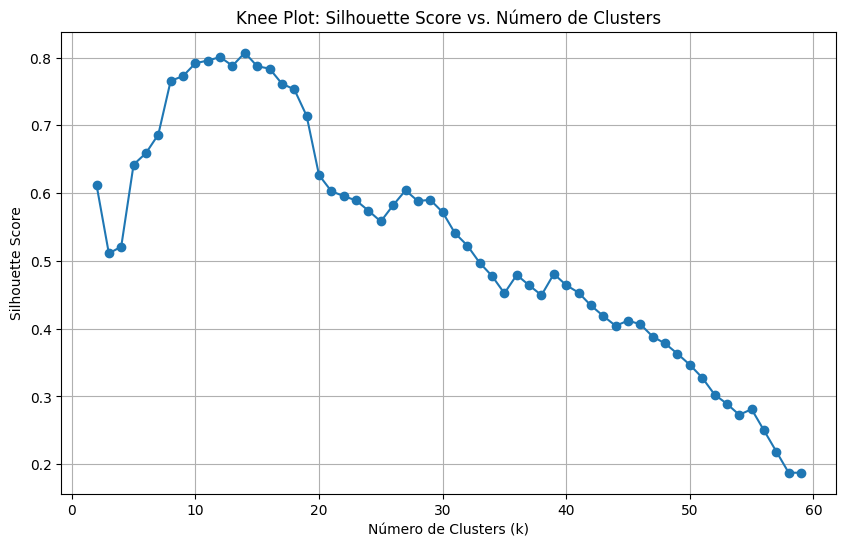

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Knee Plot: Silhouette Score vs. Número de Clusters')
plt.grid(True)
plt.show()

In [8]:
k = 4

In [9]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.6287


In [10]:
if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
else:
    X_pca = X.values

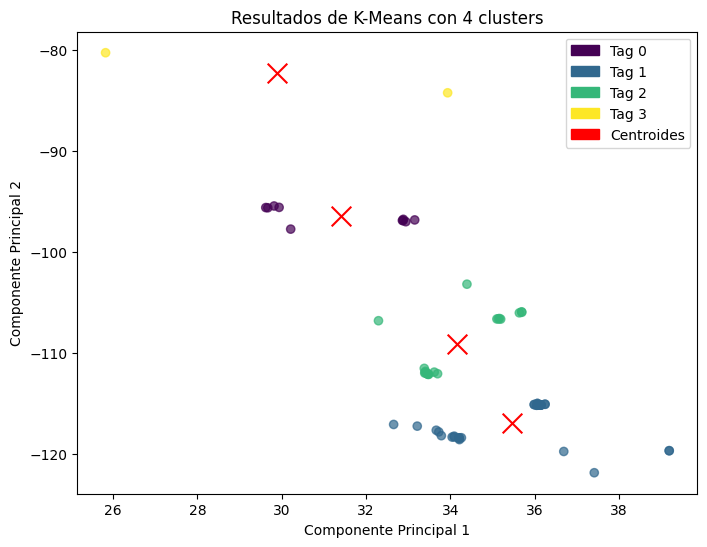

In [11]:
unique_labels = np.unique(cluster_labels)
colors = [plt.cm.viridis(i / (len(unique_labels) - 1)) for i in range(len(unique_labels))]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroides')

legend_patches = [mpatches.Patch(color=colors[i], label=f'Tag {unique_labels[i]}') for i in range(len(unique_labels))]
plt.legend(handles=legend_patches + [mpatches.Patch(color='red', label='Centroides')])

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title(f"Resultados de K-Means con {k} clusters")

plt.show()

In [12]:
rad_lat = np.radians(df['lat'])
rad_lon = np.radians(df['lon'])

df['x'] = np.cos(rad_lat) * np.cos(rad_lon)
def cartessian_cords(row):
  lat = np.radians(row['lat'])
  lon = np.radians(row['lon'])
  x = np.cos(lat) * np.cos(lon)
  y = np.cos(lat) * np.sin(lon)
  z = np.sin(lat)
  
  row['x'] = x
  row['y'] = y
  row['z'] = z
  

In [13]:
rad_lat = np.radians(df['lat'])
rad_lon = np.radians(df['lon'])

df['x'] = np.cos(rad_lat) * np.cos(rad_lon)
df['y'] = np.cos(rad_lat) * np.sin(rad_lon)
df['z'] = np.sin(rad_lat)

df

,WKT,name,lon,lat,x,y,z
0,POINT (-118.3514773 34.0412734),"A1 Electronic Recycling,",-118.351477,34.041273,-0.393501,-0.729241,0.559790
1,POINT (-118.42281 34.204152),"eWaste U.S. Electronics Recycling,",-118.422810,34.204152,-0.393650,-0.727348,0.562143
2,POINT (-118.6000354 34.2135694),"CAL E-WASTE RECYCLE LLC,",-118.600035,34.213569,-0.395853,-0.726046,0.562279
3,POINT (-118.4856892 34.2018167),"E -Waste LA (Data Destruction Company),",-118.485689,34.201817,-0.394459,-0.726935,0.562110
4,POINT (-118.4168123 34.2606906),"pasadena tech recycle inc,",-118.416812,34.260691,-0.393309,-0.726901,0.562959
...,...,...,...,...,...,...,...
59,POINT (-115.129013 35.987648),"PedalPoint evTerra Recycling,",-115.129013,35.987648,-0.343609,-0.732561,0.587611
60,POINT (-115.1854335 36.078715),"BB Recycling,",-115.185434,36.078715,-0.343933,-0.731377,0.588896
61,POINT (-115.0950232 36.2437766),"Nevada Recycling,",-115.095023,36.243777,-0.342057,-0.730379,0.591222
62,POINT (-115.193616 36.0451545),"Advanced Technology Recycling (ATR),",-115.193616,36.045155,-0.344184,-0.731639,0.588423
